In [17]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%run ../../python_scripts/tools.py

In [18]:
import os
from os.path import join
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits

In [19]:
# %run ../tools_leprecon.py

# font_setup(size=15)
# bpth = join(os.path.expanduser('~'),'Dropbox','Experiments','2019-Ito-kun','data')
# specpath = join(bpth,'spectrometer_data','20200820')
bpth = join(os.path.expanduser('~',), 'works', 'myLeprecon')
specpath = join(bpth, 'SpectrometerData', '20200820')

In [20]:
# font_setup(size=20)

# Plot waterfall
See what's going on. Plotting all spectra for all coordinates of a stepping motor.<br>
First, I changed the step to see how much the spectrum moves when I change the motor coordinate.<br>
Then I choose the delta 5000, so the spectrum moves half the way, by about 1000 pixels - so it would be easy to compare the patterns.<br>
Next I made this waterfall plot. It is easy to make and has a nice overview. Just plot all spectra with a vertical shift, so they dont overlap too much.

NameError: name 'gritix' is not defined

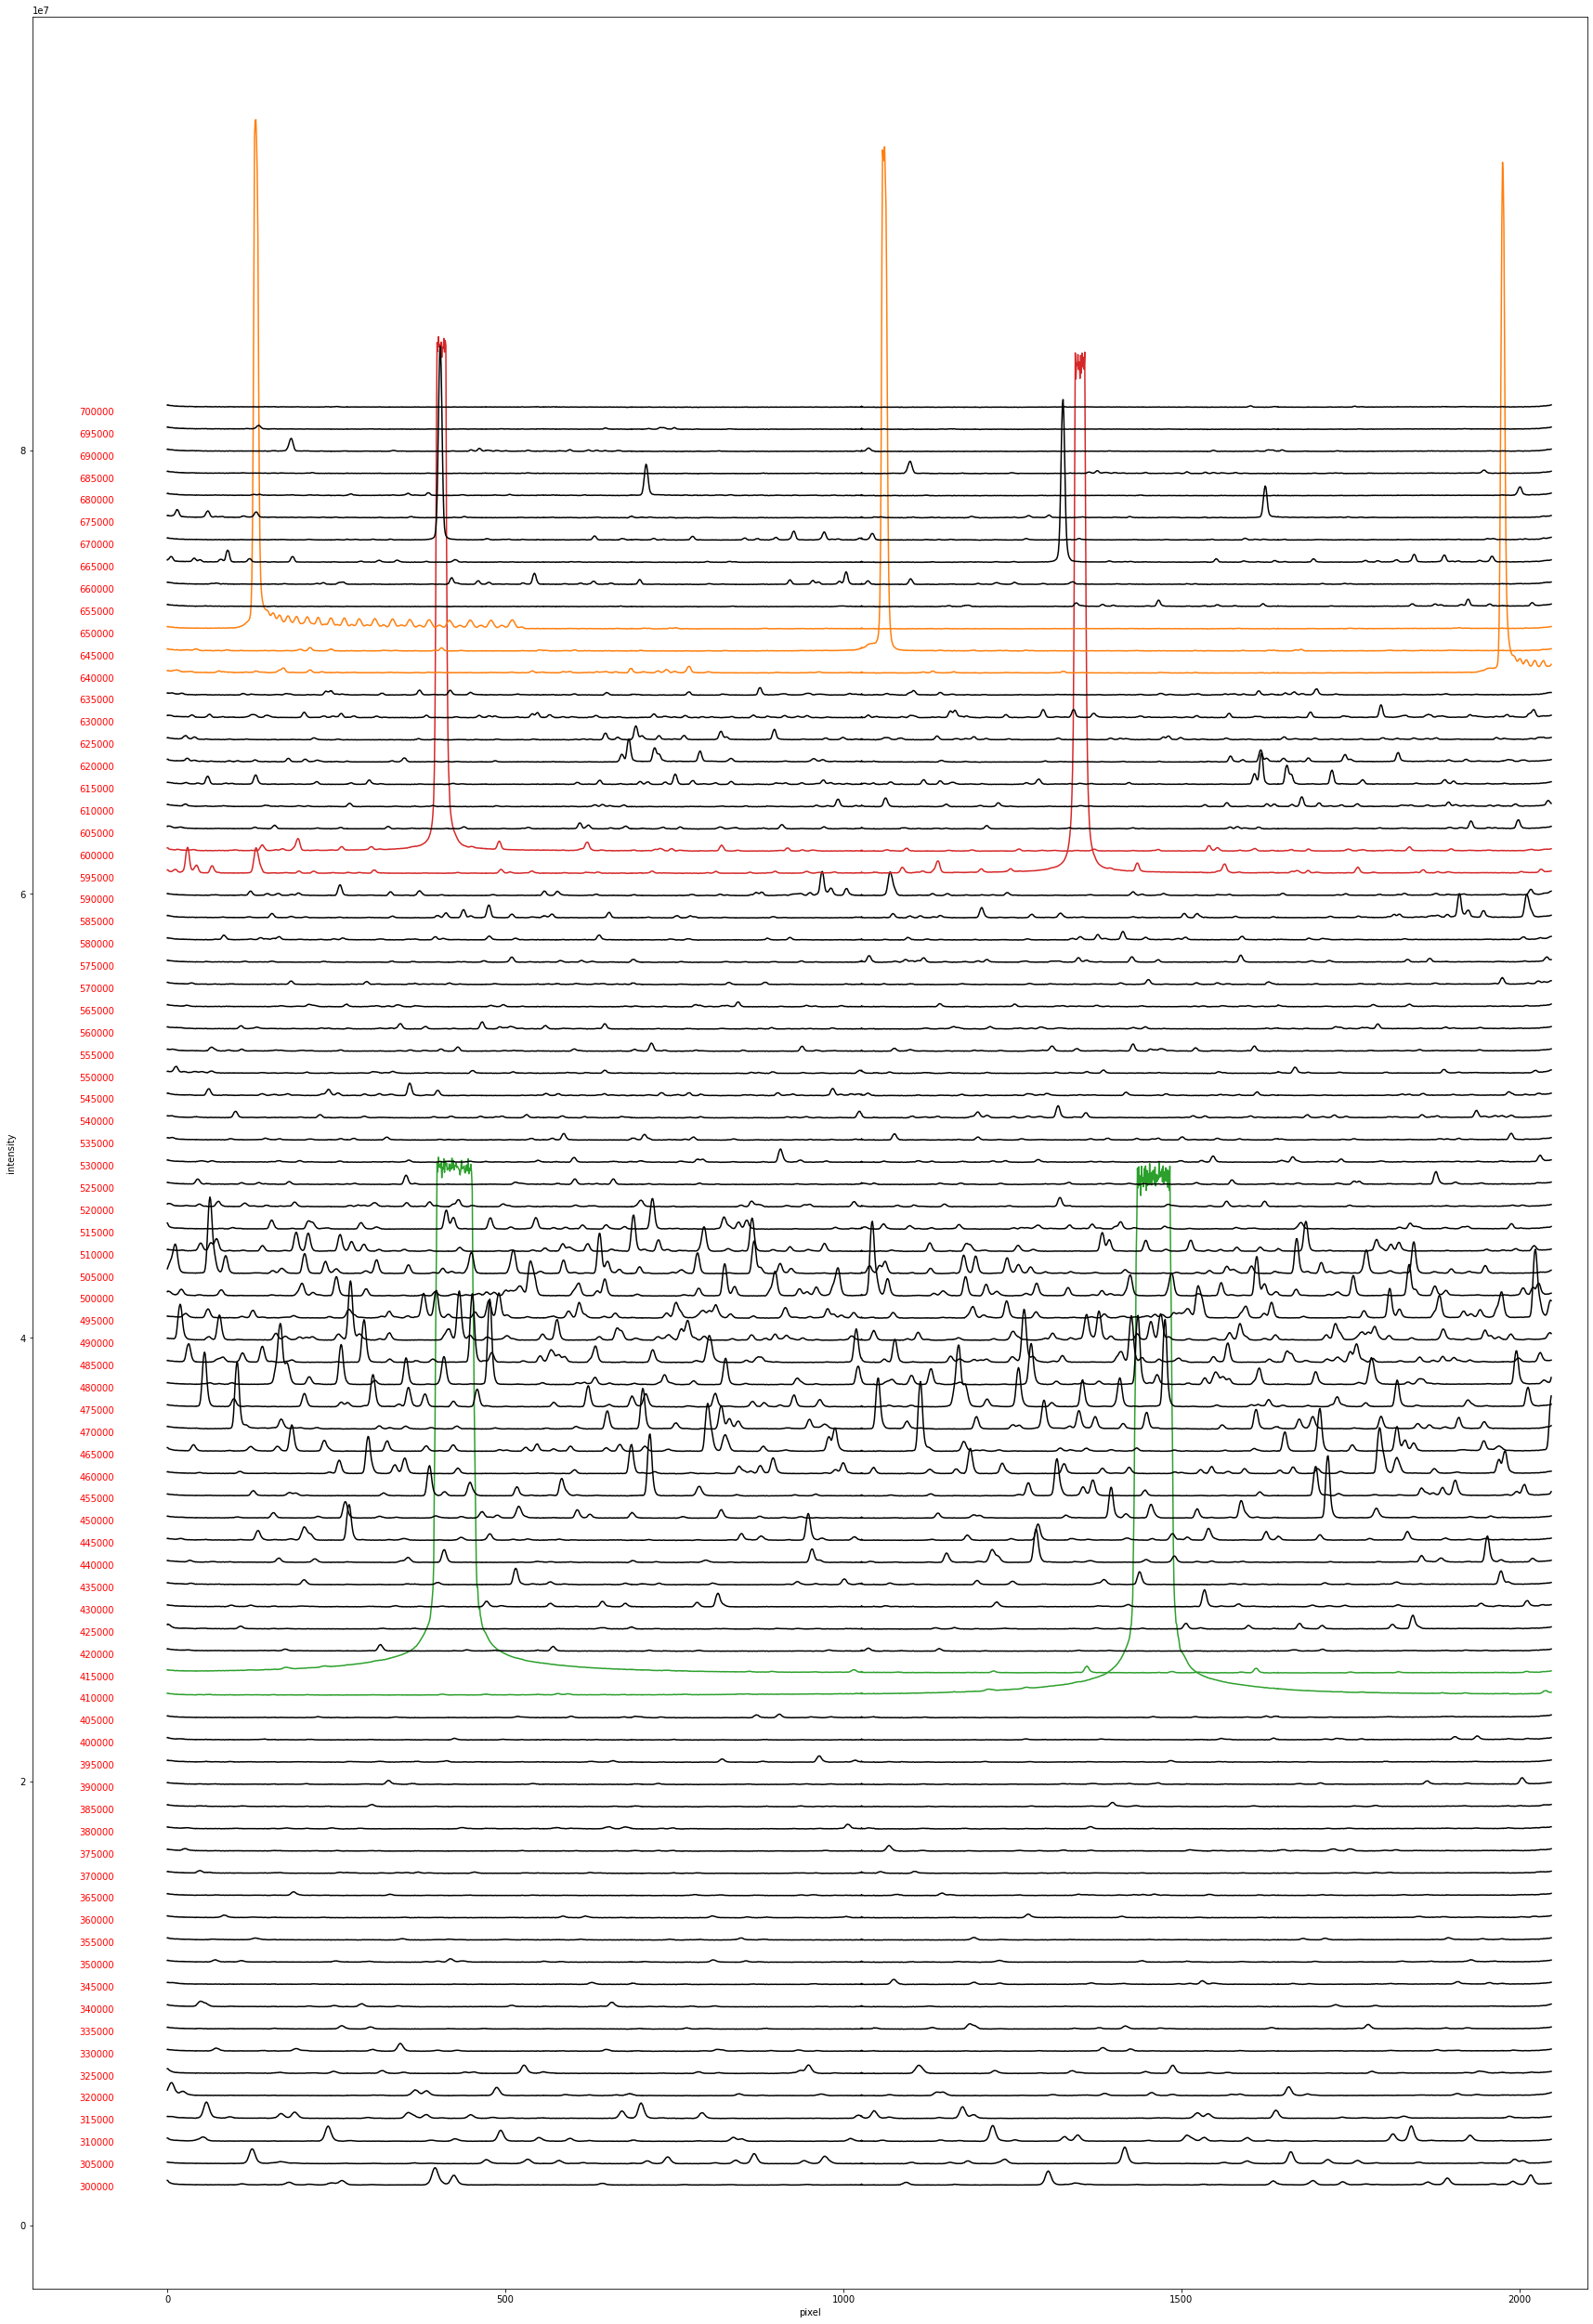

In [21]:
fig=gcf()
fig.set_facecolor('w')
fig.set_size_inches([30,45])
R = [f'{300000 + 5000*i}.fit' for i in range(81)]
for i,fp in enumerate(R):
    image_data = fits.getdata(get_pkg_data_filename( join(specpath,fp)),ext=0)
    c = 'k'
    if '410000' in fp or '415000' in fp: c = 'C2'
    if '600000' in fp or '595000' in fp: c = 'C3'
    if '640000' in fp or '645000' in fp or '650000' in fp: c = 'C1'
        
        
    plot(image_data.sum(axis=0)+i*1e6,f'{c}')
    
[text(-130,1.6e6+1e6*i,t[:-4],color='r') for i,t in enumerate(R)]
xlim(-200,2100)

xlabel('pixel')
ylabel('intensity')
gritix()
#savefig('../img/hspectra.pdf',dpi=200,bbox_inches='tight')
plt.close()

In [7]:
#R = [f'{i}.fit' for i in [300000,301000,305000,310000,315000,350000,400000]]
R = [f'{300000 + 5000*i}.fit' for i in range(81)]

In [8]:
[i for i in R if '410000' in i or '415000' in i]

['410000.fit', '415000.fit']

# Overlap neighbours with H-alpha

I plot neighboring frames in one figure, then shift them so the spectra coincede by adjusting the H-alpha position. This way we can get a rough shift in pixels for our selected shift in the stepping mottor coordinate. Note: stepping motor here rotates the grating, so the projection on the sensor is moving and we can record different wavelengths.

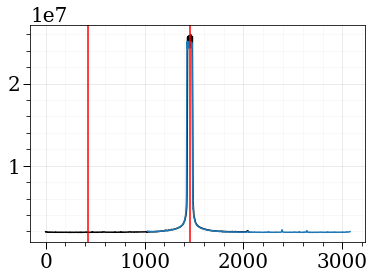

In [9]:
x = np.arange(2048)
fp = '410000.fit'
image_data = fits.getdata(get_pkg_data_filename( join(specpath,fp)),ext=0)
plot(x,image_data.sum(axis=0),'k')
fp = '415000.fit'
image_data = fits.getdata(get_pkg_data_filename( join(specpath,fp)),ext=0)
plot(x+1030,image_data.sum(axis=0),'C0')

gritix()

axvline(425,c='r')
axvline(1455,c='r')

In [10]:
# Pixel to motor coordinate ratio
f'{1030/5000} pixels / motor coordinate'

'0.206 pixels / motor coordinate'

# Make an overlap spectrum

In [11]:
R = [f'{410000 + 5000*i}.fit' for i in range(50)]

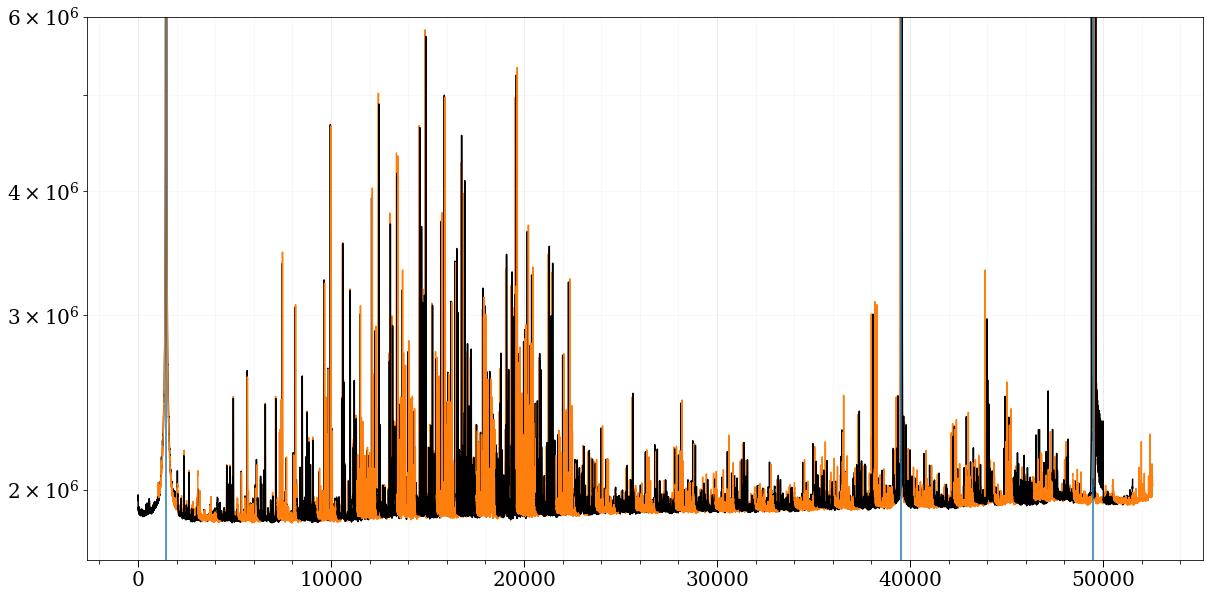

In [12]:
fig=gcf()
fig.set_facecolor('w')
fig.set_size_inches([20,10])

x = np.arange(2048)
for i,fp in enumerate(R):
    c = 'k'
    if i%2: c = 'C1'
    image_data = fits.getdata(get_pkg_data_filename( join(specpath,fp)),ext=0)
    y = image_data.sum(axis=0)
    plot(x+i*1031,y,f'{c}')


gritix()
yscale('log')
ylim(1.7e6,6e6)
#xlim(0,2000)
axvline(1455)
#xlim(39000,41000)
axvline(39550)
#xlim(49000,50000)
axvline(49500)

# Make a rough calibration

Text(0, 0.5, 'wavelength, nm')

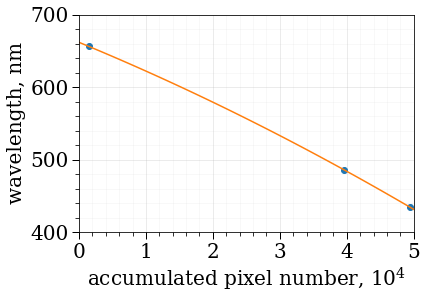

In [13]:
balmers = np.array([656.279,486.135,434.047])
rs = np.array([1455,39550,49500])
plot(rs/1e4,balmers,'o')

fun = np.poly1d(np.polyfit(rs,balmers,2))
xp = np.linspace(0,50000,100)
plot(xp/1e4,fun(xp))
gritix()
ylim(400,700)
xlim(0,5)
xlabel('accumulated pixel number, $10^{4}$')
ylabel('wavelength, nm')

# Apply rough calibration

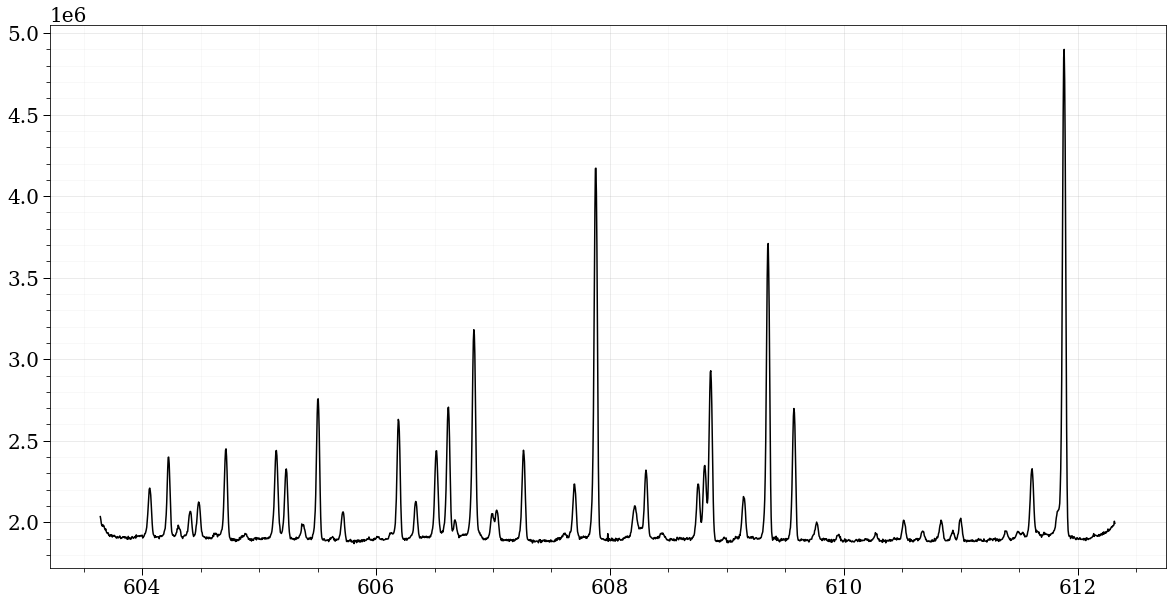

In [14]:
fig=gcf()
fig.set_facecolor('w')
fig.set_size_inches([20,10])

x = np.arange(2048)
rcoord = 470000
fp = f'{rcoord}.fit'
dx = (rcoord - 410000)*(1030/5000)
image_data = fits.getdata(get_pkg_data_filename( join(specpath,fp)),ext=0)
plot(fun(x+dx),image_data.sum(axis=0),'k')
gritix()

(595.0, 630.0)

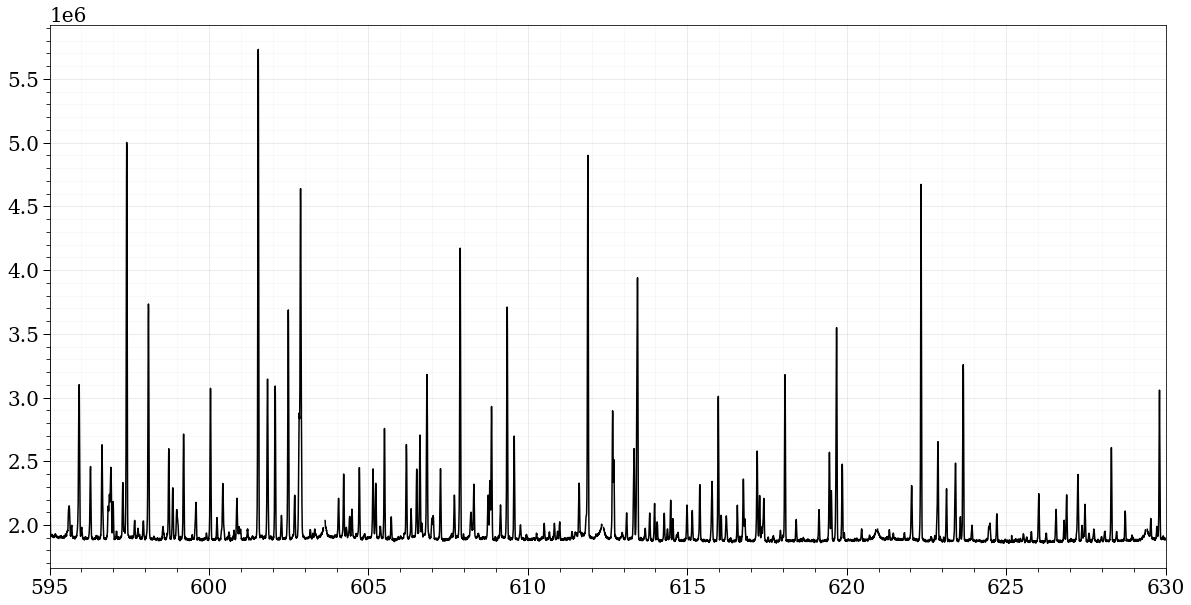

In [15]:
fig=gcf()
fig.set_facecolor('w')
fig.set_size_inches([20,10])

R = [f'{430000 + 10000*i}.fit' for i in range(8)]
x = np.arange(2048)
for i,fp in enumerate(R):
    rcoord = int(fp[:-4])
    dx = (rcoord - 410000)*(1030/5000)
    c = 'k'
    image_data = fits.getdata(get_pkg_data_filename( join(specpath,fp)),ext=0)
    y = image_data.sum(axis=0)
    plot(fun(x+dx),y,f'{c}')
    
gritix()
xlim(595,630)

# The error must be about 1 nm

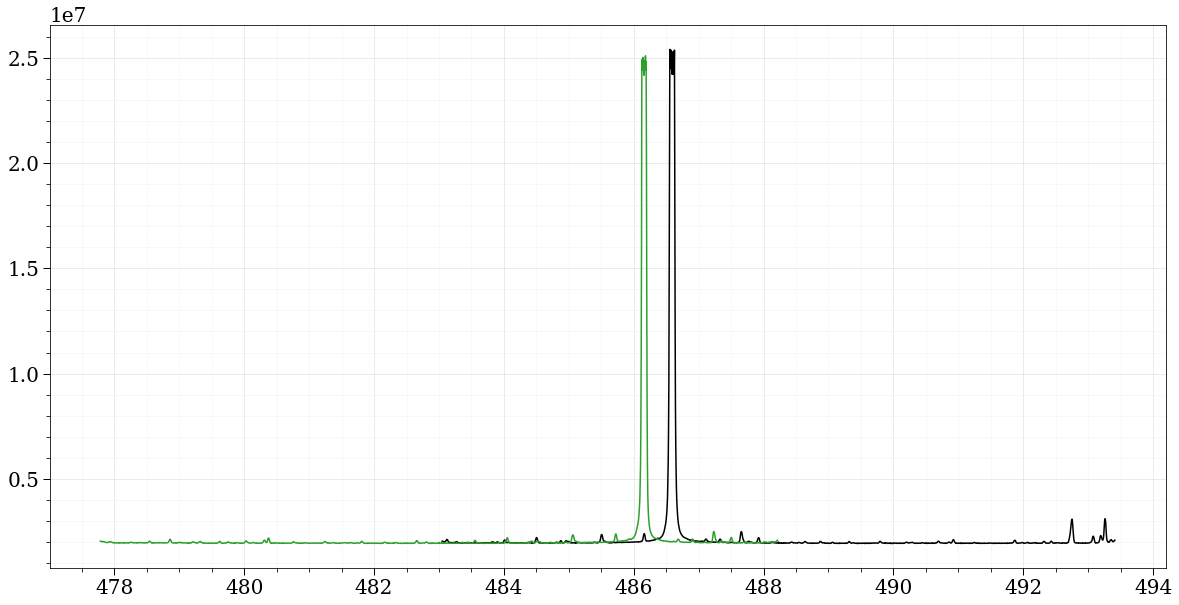

In [16]:
fig=gcf()
fig.set_facecolor('w')
fig.set_size_inches([20,10])

R = [f'{595000 + 5000*i}.fit' for i in range(2)]
x = np.arange(2048)
for i,fp in enumerate(R):
    rcoord = int(fp[:-4])
    dx = (rcoord - 410000)*(1030/5000)
    c = 'k'
    if i%2: c='C2'
    image_data = fits.getdata(get_pkg_data_filename( join(specpath,fp)),ext=0)
    y = image_data.sum(axis=0)
    plot(fun(x+dx),y,f'{c}')
    
gritix()

# Plot all spectra with calibration

In [17]:
R = [f'{410000 + 5000*i}.fit' for i in range(50)]

Text(0.05, 0.92, 'stepping motor\ncoordinate')

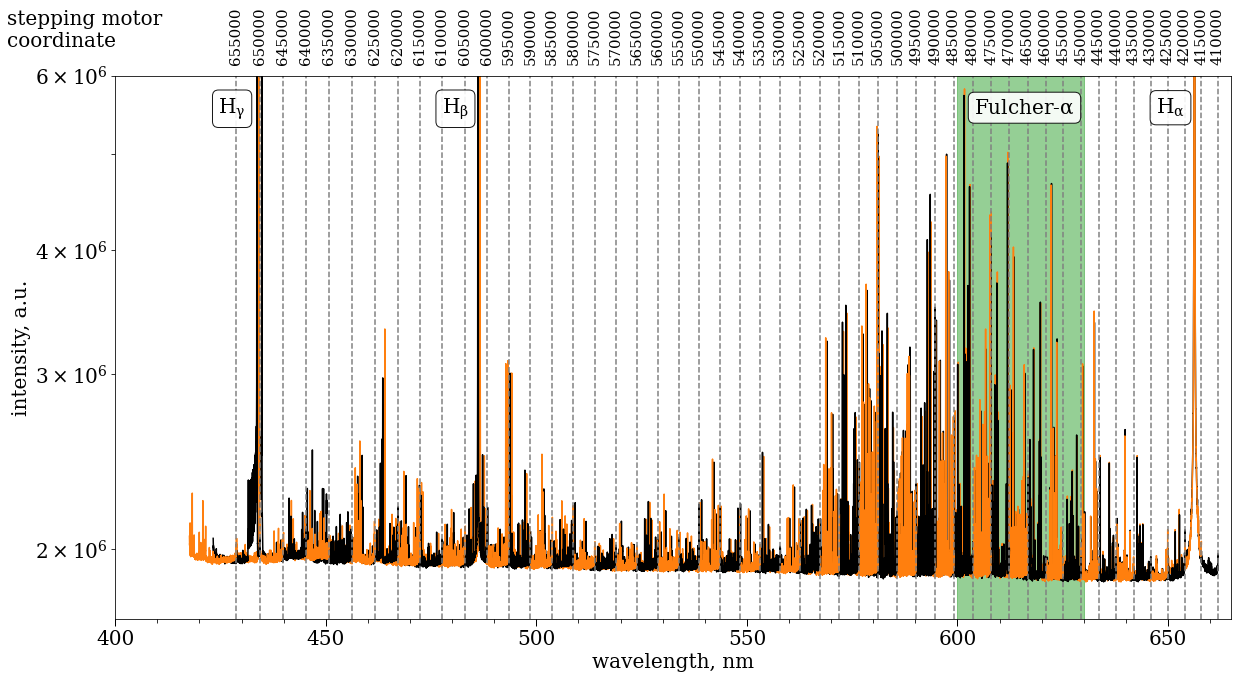

In [18]:
fig=gcf()
fig.set_facecolor('w')
fig.set_size_inches([20,10])

x = np.arange(2048)
for i,fp in enumerate(R):
    rcoord = int(fp[:-4])
    dx = (rcoord - 410000)*(1030/5000)
    c = 'k'
    if i%2: c = 'C1'
    image_data = fits.getdata(get_pkg_data_filename( join(specpath,fp)),ext=0)
    y = image_data.sum(axis=0)
    plot(fun(x+dx),y,f'{c}')
    text(fun(dx),6.2e6,rcoord,rotation=90,fontsize=15,ha='center')
    axvline(fun(dx),c='gray',ls='--')
    
ax = gca()
ax.axvspan(600,630,color='C2',alpha = 0.5)
props = dict(boxstyle='round', facecolor='w', alpha=0.9)
ax.text(604,5.5e6,'Fulcher-$\\alpha$',ha='left',bbox=props)
ax.text(654,5.5e6,'$H_\\alpha$',ha='right',bbox=props)
ax.text(484,5.5e6,'$H_\\beta$',ha='right',bbox=props)
ax.text(431,5.5e6,'$H_\\gamma$',ha='right',bbox=props)

ticks_visual(ax)

yscale('log')
ylim(1.7e6,6e6)
xlim(400,665)

xlabel('wavelength, nm')
ylabel('intensity, a.u.')
fig.text(0.05,.92,'stepping motor\ncoordinate')

#savefig('../img/H2_lamp_spec_rough_calibration.png', dpi=200, bbox_inches='tight')